# Analyser les ventes d'un site de e-commerce spécialisé dans les livres

L'entreprise pour qui vous travaillez souhaite analyser les ventes de son site et mieux connaitre ses clients, ainsi que le détail des ventes de ses produits

Vous pourrez télécharger l'ensemble des données [via ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip)  Les données que vous avez à disposition :   
* les ventes (appelées “Transactions”)  
* la liste des clients  
* la liste des produits.

## Nettoyage des données

Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

Pour vous guider, voici quelques choses à explorer :  
* l'évolution du Chiffre d'Affaire de manière mensuelle
* Tester les différentes jointures possibles entre les tables (pour rappel, il en existe [4 types](http://python-simple.com/python-pandas/concatenations-joins-dataframe.php ))
* Des valeurs abérrantes sont présentes dans la table *transaction*, identifiez-les et supprimez-les de votre étude.
* Regarder le nombre de transaction par client ou le nombre de CA par client

Vous aurez donc des choix à faire : imputation de valeurs manquantes, gestions de valeurs atypiques etc.

A noter : enregistrer vos données nettoyées dans un fichier csv, nous le réutiliserons ensuite pour étudier les corrélations

In [1]:
import pandas as pd

In [234]:
df_transaction = pd.read_csv('./dataset/transactions.csv')
del df_transaction

In [235]:
from os import listdir
from pathlib import Path
directory_path = './dataset/'
listdir_data = listdir(directory_path)
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

Recommençons.

In [114]:
del df_transaction

In [278]:
# fetch virgin csv using the method listdir from os library. Then build a list of the three df_

df_customers = pd.read_csv(directory_path + listdir_data[0])
df_products = pd.read_csv(directory_path + listdir_data[1])
df_transactions =  pd.read_csv(directory_path + listdir_data[2])
list_df_datas = [df_customers,df_products,df_transactions]

In [112]:
# tentative de récupérer le nom d'une variable. Fail : df_customers.__name__ 

In [123]:
# for df in list_df_datas :  {fail --> print(globals().items()[0])} ,  print(df.describe()), print('')

Il y a un prix négatif dans df_products, ils n'ont pas de sens => suppresion

In [239]:
for df in list_df_datas : print(df.describe())

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855


In [263]:
df_products[df_products['price']<0] # Dans df_products, montrer les produits dont le prix est inférieur à 0

,id_prod,price,categ
731,T_0,-1.0,0


In [280]:
#Je fais ça pour que cette méthode soit identique s'il y a plusieurs occurences. Même si ici, il n'y en a qu'une...
list_to_remove = df_products[df_products['price']<0]


,id_prod,price,categ
731,T_0,-1.0,0


In [301]:
list_to_remove.id_prod

731    T_0
Name: id_prod, dtype: object

In [265]:
# tentative d'utiliser la méthod insert
#for row in df_products[df_products['price']<0] : list_id_prod.insert(0,row[row.index])

In [281]:
 # c'est là que c'est puissant d'utiliser une liste puisqu'on drop tout d'un coup
df_products = df_products.drop(list_to_remove.index)

En réalité l'idée était de récupérer l'id_prod pour le supprimer facilement de la table transaction.

In [282]:
df_products[df_products['price']<0] # ça a marché

,id_prod,price,categ


In [283]:
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

In [347]:
list_df_datas[1] = df_products
list_df_datas[1][df_products['price']<0]

,id_prod,price,categ


In [288]:
for df in list_df_datas : print(df.isna().sum()), print('') # il y a-t-il des valeurs non renseignées ?

client_id    0
sex          0
birth        0
dtype: int64

id_prod    0
price      0
categ      0
dtype: int64

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64



In [290]:
for df in list_df_datas : print(df.columns), print(df.shape), print('')

Index(['client_id', 'sex', 'birth'], dtype='object')
(8623, 3)

Index(['id_prod', 'price', 'categ'], dtype='object')
(3286, 3)

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
(337016, 4)



Un de moins 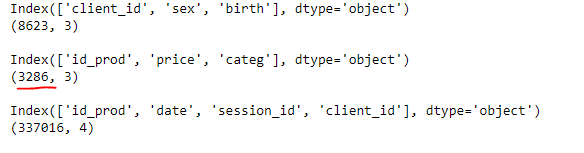


In [304]:
df_transactions[df_transactions['id_prod'] == 'T_0'].count()

id_prod       200
date          200
session_id    200
client_id     200
dtype: int64

Il y a 200 transaction avec ce produit au prix négatif... Une tentative d'arnaque ? 

In [350]:
transaction_to_remove = df_transactions[df_transactions['id_prod'] == 'T_0']
transaction_to_remove

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [311]:
df_transactions[df_transactions['id_prod'] == 'T_0'].describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


In [391]:
transaction_to_remove = df_transactions[df_transactions['id_prod'] == 'T_0']
customer1ToRemove = df_customers[df_customers['client_id'] == ('ct_1')]
customer2ToRemove = df_customers[df_customers['client_id'] == ('ct_0')]

In [393]:
customer2ToRemove

,client_id,sex,birth
2735,ct_0,f,2001


In [326]:

print(df_transactions[(df_transactions['client_id'] == ('ct_1'))].count()),
df_transactions[(df_transactions['client_id'] == ('ct_0'))].count()

id_prod       94
date          94
session_id    94
client_id     94
dtype: int64


id_prod       106
date          106
session_id    106
client_id     106
dtype: int64

In [ ]:
print(df_transactions[(df_transactions['client_id'] == ('ct_1'))].count()),
df_transactions[(df_transactions['client_id'] == ('ct_0'))].count()

In [331]:
len(df_transactions[df_transactions['id_prod']== 'T_0']['session_id']=='s_0')

200

In [341]:
max(df_transactions[df_transactions['id_prod'] == 'T_0']['date']), min(df_transactions[df_transactions['id_prod'] == 'T_0']['date'])

('test_2021-03-01 02:30:02.237450', 'test_2021-03-01 02:30:02.237412')

C'est assez étrange, on a 2 clients (ct_0(femme de 2001) et ct_1(homme de 2001) qui ont fait 200 transactions (94 + 106) d'un prix de -1 au cours d'une même session s_0 qui s'est à la même seconde à des dates au format étrange "test_..." entre 'test_2021-03-01 02:30:02.237450', 'test_2021-03-01 02:30:02.237412' soit en 38*10^-6 secondes.

Alors ? Test ou arnaque de 200€ ???? Mystère !

In [353]:
df_transactions = df_transactions.drop(transaction_to_remove.index)

In [354]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


200 lignes de supprimées 
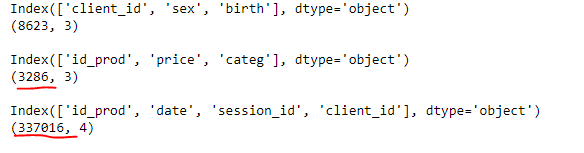

In [356]:
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

In [358]:
list_df_datas[2] = df_transactions

ct_0 et ct_1 n'ont plus de transaction. Je peux les supprimer de la table client.

In [390]:
customerToRemove.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [395]:
df_customers = df_customers.drop(customer2ToRemove.index)

KeyError: '[2735] not found in axis'

In [397]:

df_customers = df_customers.drop(customer1ToRemove.index)

In [402]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


Suppression de 2 customers 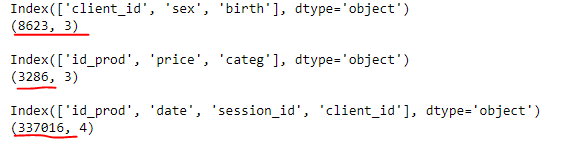
